<a href="https://colab.research.google.com/github/ZinoTAT/Machine-Learning-Practices/blob/master/practices/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

VGG16小练习，pytorch实现
参考样例：[TRAINING A CLASSIFIER](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py)



In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals

import torch
import torchvision as tv
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt

print("torch_version",torch.__version__)

torch_version 1.3.1


In [0]:
class VGG16(torch.nn.Module):
  def __init__(self, n_class=9, h=128, w = 128):
    super(VGG16, self).__init__()
    self.ReLU = torch.nn.ReLU(inplace=True)
    self.MaxPool = torch.nn.MaxPool2d(2, stride=2, ceil_mode=True)
    #第一层
    self.conv1_1 = torch.nn.Conv2d(3, 64, 3, padding=1)
    self.conv1_2 = torch.nn.Conv2d(64, 64, 3, padding=1)
    
    #第二层
    self.conv2_1 = torch.nn.Conv2d(64, 128, 3, padding=1)
    self.conv2_2 = torch.nn.Conv2d(128, 128, 3, padding=1)

    #第三层
    self.conv3_1 = torch.nn.Conv2d(128, 256, 3, padding=1)
    self.conv3_2 = torch.nn.Conv2d(256, 256, 3, padding=1)
    self.conv3_3 = torch.nn.Conv2d(256, 256, 3, padding=1)

    #第四层
    self.conv4_1 = torch.nn.Conv2d(256, 512, 3, padding=1)
    self.conv4_2 = torch.nn.Conv2d(512, 512, 3, padding=1)
    self.conv4_3 = torch.nn.Conv2d(512, 512, 3, padding=1)

    #第五层
    self.conv5_1 = torch.nn.Conv2d(256, 512, 3, padding=1)
    self.conv5_2 = torch.nn.Conv2d(512, 512, 3, padding=1)
    self.conv5_3 = torch.nn.Conv2d(512, 512, 3, padding=1)

    #全连接层
    self.Linear1 = torch.nn.Linear((h * w) / (32 * 32) * 512, 4096)
    self.Linear2 = torch.nn.Linear(4096, 4096)
    self.Linear3 = torch.nn.Linear(4096, 1000)
    
    #softmax
    self.output = torch.nn.Linear(1000, n_class)
    self.softmax = torch.nn.softmax(n_class)
  def forward(self, x):
    h = self.ReLU(self.conv1_1(x))
    h = self.ReLU(self.conv1_2(h))
    h = self.MaxPool(h)

    h = self.ReLU(self.conv2_1(h))
    h = self.ReLU(self.conv2_2(h))
    h = self.MaxPool(h)

    h = self.ReLU(self.conv3_1(h))
    h = self.ReLU(self.conv3_2(h))
    h = self.ReLU(self.conv3_3(h))
    h = self.MaxPool(h)

    h = self.ReLU(self.conv4_1(h))
    h = self.ReLU(self.conv4_2(h))
    h = self.ReLU(self.conv4_3(h))
    h = self.MaxPool(h)

    h = self.ReLU(self.conv5_1(h))
    h = self.ReLU(self.conv5_2(h))
    h = self.ReLU(self.conv5_3(h))
    h = self.MaxPool(h)

    h = self.ReLU(self.Linear1(h))
    h = self.ReLU(self.Linear2(h))
    h = self.ReLU(self.Linear3(h))

    h = self.softmax(h)
    return h



In [8]:
module = VGG16
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = tv.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = tv.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

170500096it [00:01, 89347787.15it/s]                               


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


打印以小组图出来看看

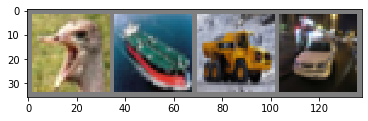

 bird  ship truck   car


In [10]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(tv.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
def train(data, module, criterion, optimizer, epoch):
  for i in range(epoch):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
      # get the inputs; data is a list of [inputs, labels]
      inputs, labels = data

      # zero the parameter gradients
      optimizer.zero_grad()

      # forward + backward + optimize
      outputs = module(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      # print statistics
      running_loss += loss.item()
      if i % 2000 == 1999:    # print every 2000 mini-batches
          print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
          running_loss = 0.0

    


定义损失函数和优化方式

In [23]:
import torch.optim as optim

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(module.self, lr=0.001, momentum=0.9)

AttributeError: ignored

In [14]:
train(trainloader, module, criterion, optimizer, 2)

NameError: ignored

In [22]:
class a(torch.nn.Module):
  def __init__(self):
    super(a, self).__init__()

mo = a
print(mo.parameters())

TypeError: ignored